# Rozpoznawanie końcowej oceny studenta przy pomocy klasyfikacji

Projekt realizowany w ramach laboratorium z _Analizy Danych_ prowadzonych przez dr inż. Grzegorza Sarwasa.

## Opis postawionego problemu

## Określenie parametrów danych
Wyznaczenie liczby obiektów, liczby klas, zakress zmienności poszczególnych atrybutów, ich
wartości statystycznych, poziom wypełnienia kolumn, ilość unikalnych danych itp. 

**TODO:** Opisać znaczenie kolumn

### Przygotowanie środowiska

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

### Wczytanie danych i przygotowanie do analizy
Wszystkie dane mają określone wartości. Nie trzeba więc usuwać żadnych obiektów

In [51]:
df = pd.read_csv("student-por.csv")

liczbaBarkow = df.isnull().sum().sum()
print(f"Liczba brakujących danych: {liczbaBarkow}\n")

Liczba brakujących danych: 0



### Podstawowe parametry danych

In [4]:
print(f"Liczba obiektów wynosi {df.shape[0]}.\n")

print(f"Każdy obiekt opisują {df.columns.size} atrybuty.")
print("3 ostatnie trybuty to oceny, które należy wyznaczyć.")
print(f"Pozostaje więc {df.columns.size - 3} atrybutów do analizy.")

Liczba obiektów wynosi 649.

Każdy obiekt opisują 33 atrybuty.
3 ostatnie trybuty to oceny, które należy wyznaczyć.
Pozostaje więc 30 atrybutów do analizy.


In [5]:
podstawoweAtrybuty = df.columns[1:-2]
podstawoweAtrybuty.size

30

### Pryzgotowanie danych do analizy i wyznaczenie zakresów zmienności poszczególnych atrybutów

Wyszukanie braków w danych

In [7]:
df.isnull().sum().sum()

0

Nie ma brakujących danych, więc nie trzeba usuwać żadnych wierszy ani kolumn.

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


**Nie wszystkie atrybuty** są uwzględnione. Pzeanalizujmy typy wczytanych atrybutów by znaleźć przyczynę.

In [23]:
poprawneKolumny = df.describe().columns

brakujaceKolumny = np.setdiff1d(df.columns, poprawneKolumny)

print("Lista brakujących kolumn")
brakujaceKolumny

Lista brakujących kolumn


array(['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize',
       'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid',
       'reason', 'romantic', 'school', 'schoolsup', 'sex'], dtype=object)

Możliwe, że brakujące kolumny mają inny typ

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [ ]:
## Innte rozwiązanie niż ponżej 


Okazuje się, że brakujące dane są typu `object`. Może zmiana na typ kategoryczny poprawi rezultaty.

In [39]:
for k in brakujaceKolumny:
    df[k] = df[k].astype('category')
    
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


Ciągle nie ma kategorycznych kolumn. By to zmienić musiałby mieć wartości liczbowe.  
Dla każdego atrybutu trzeba ustalić odpowiednie wartości liczbowe.

In [48]:
df.sex.cat.categories = [0, 1]
df.sex = df.sex.astype('float')

df.describe()

,sex,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,0.41,16.74,2.51,2.31,1.57,1.93,0.22,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,0.49,1.22,1.13,1.10,0.75,0.83,0.59,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,0.00,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,0.00,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,0.00,17.00,2.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,1.00,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,1.00,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


## Analiza korelacji między zmiennymi

Wszystkie dane typu `object` **nie występują**

Może trzeba je zamienić na dane kategoryczne?

**TODO:** Histogramy dla poszczególnych atrybutów

Korelacja poszczególnych atrybutów

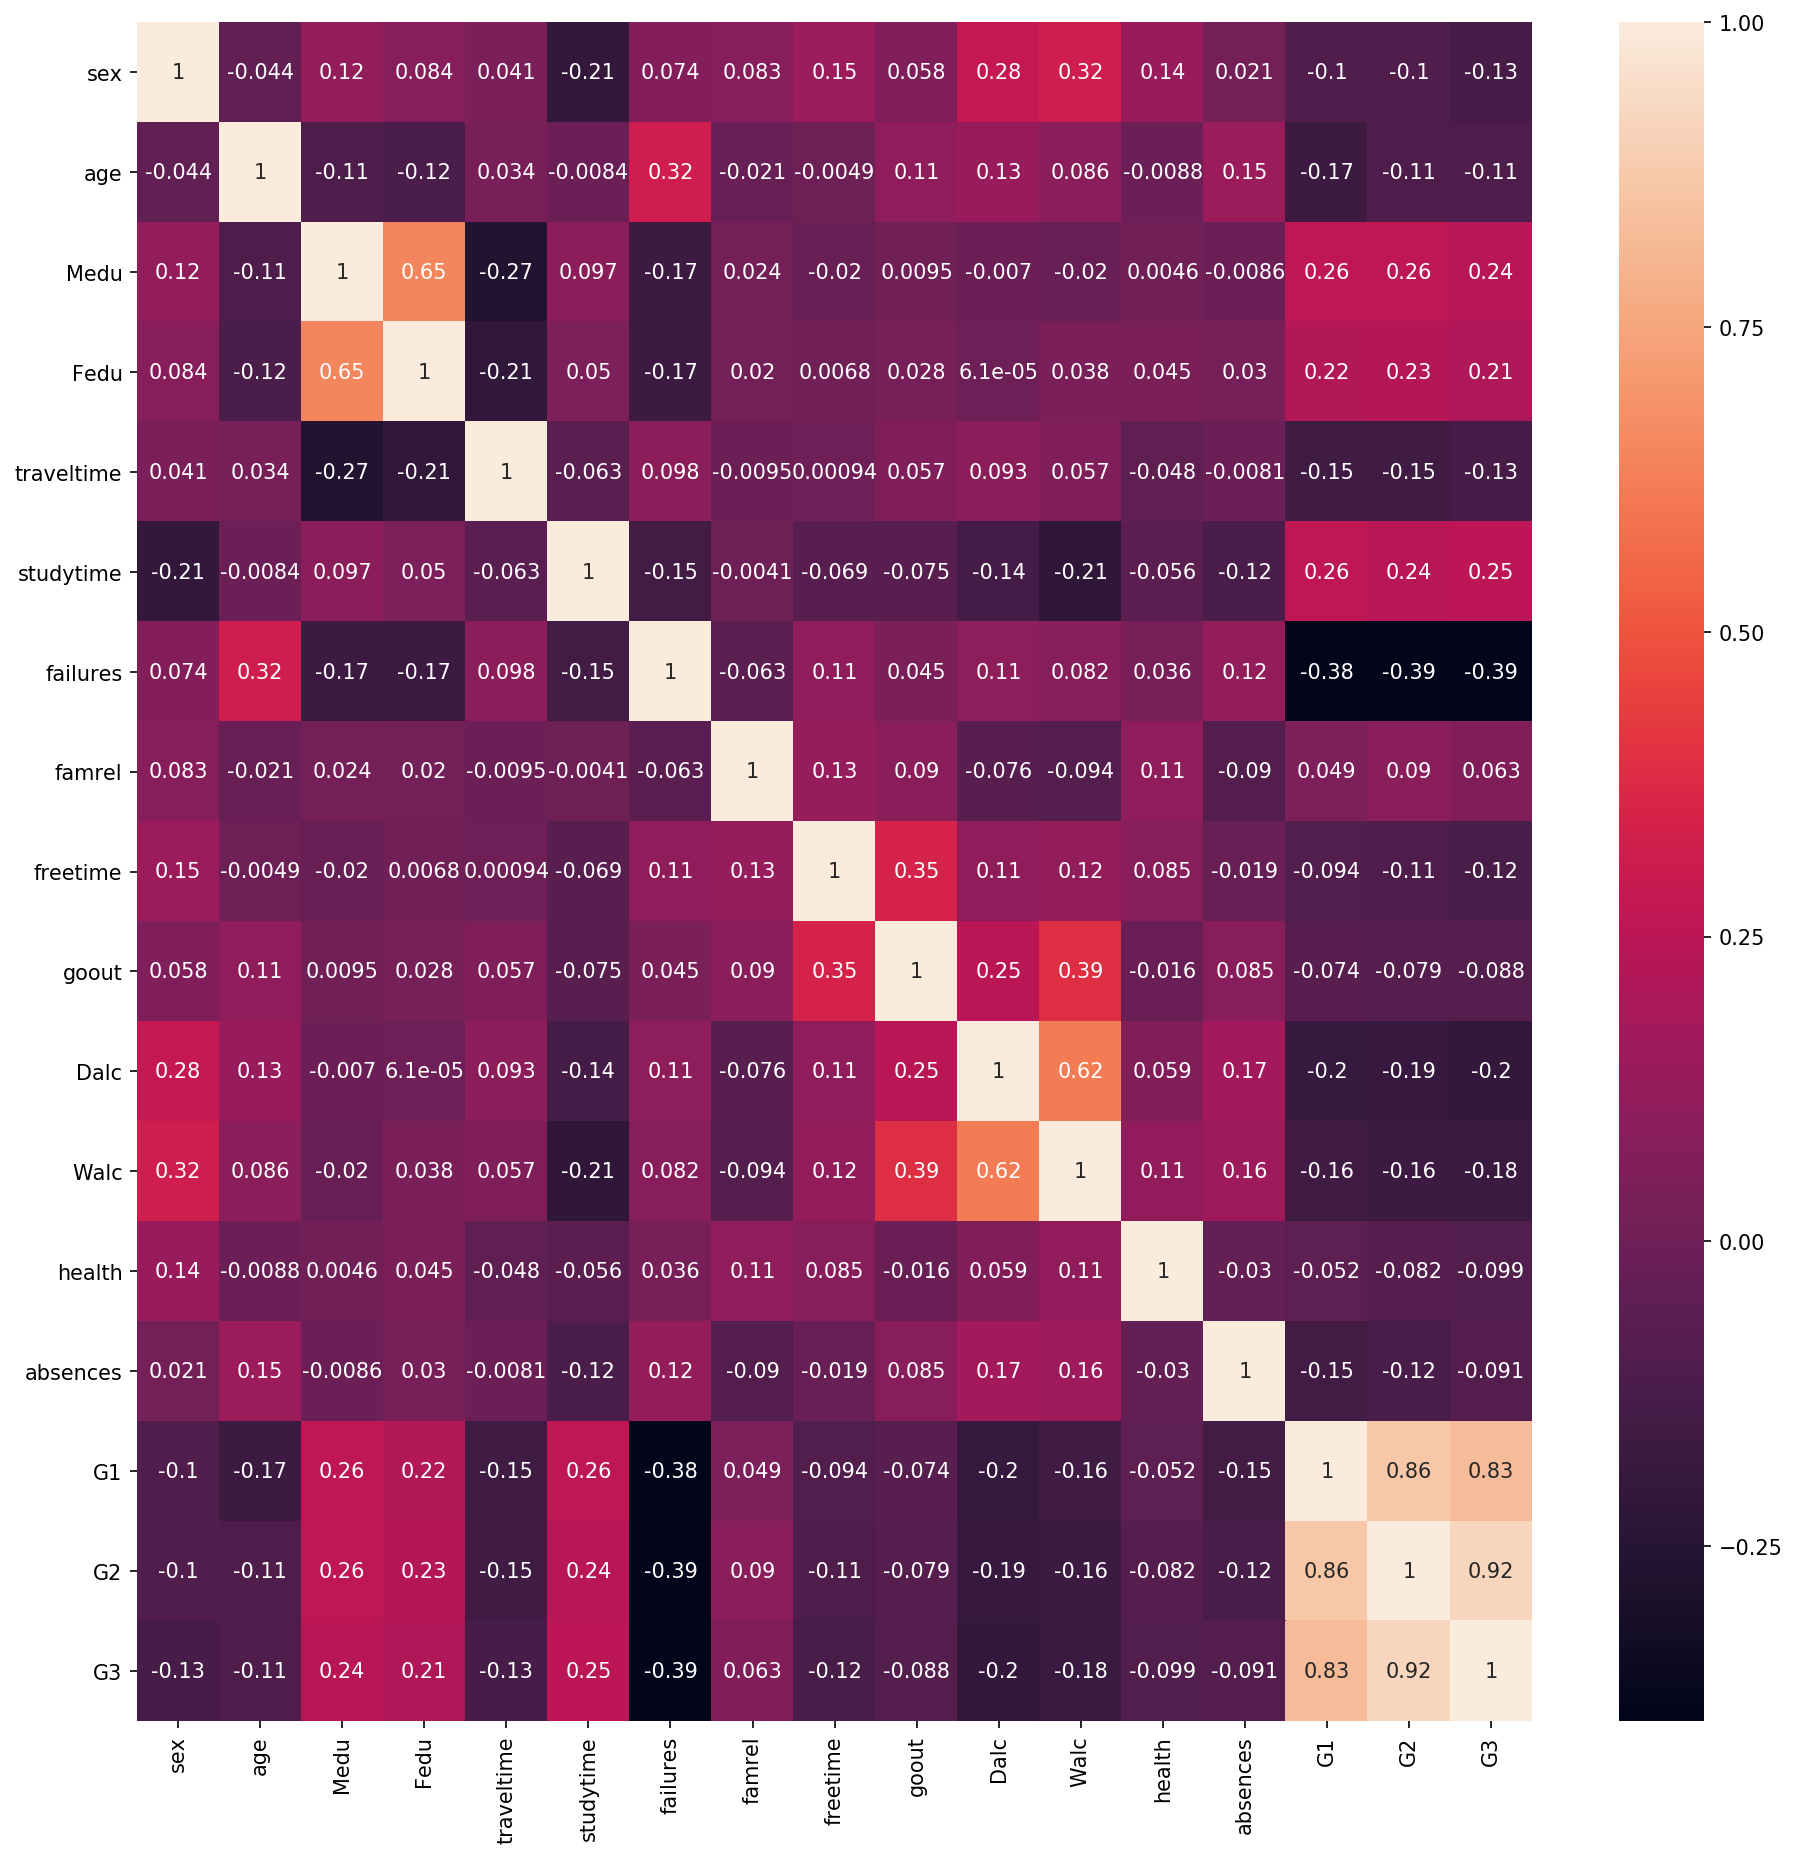

In [49]:
plt.figure(figsize=(15,15),dpi = 150)
sns.heatmap(df.corr(),annot = df.corr())

Koralacja atybutów z ocenami

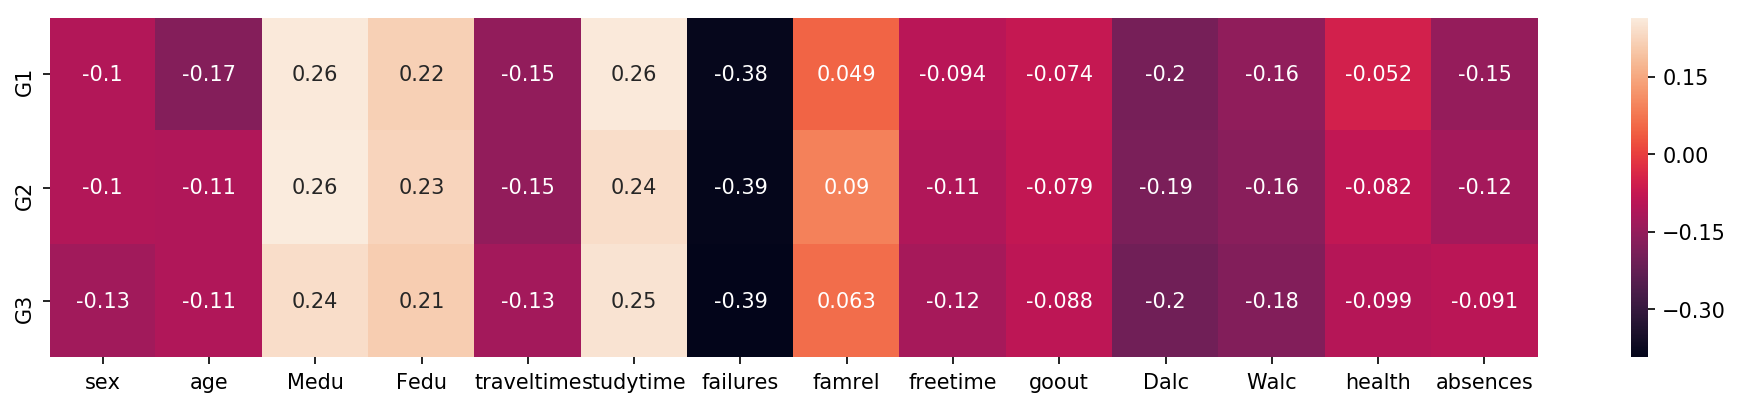

In [50]:
kolrelacjeOcen = df.corr().iloc[-3:, :-3]

plt.figure(figsize=(16,3),dpi = 150)
sns.heatmap(kolrelacjeOcen,annot = kolrelacjeOcen)

Upożądkowanie atrybutów pod kątem ich wpływu na oceny

In [51]:
corelacjeAtrybutow = kolrelacjeOcen.mean()

posortowaneAtrybuty = corelacjeAtrybutow.abs().sort_values(ascending=False)
posortowaneAtrybuty = pd.DataFrame(posortowaneAtrybuty, columns=["Korelacja z ocenami"])
posortowaneAtrybuty.index.name = "Atrybut"

posortowaneAtrybuty

,Korelacja z ocenami
Atrybut,
failures,0.39
Medu,0.25
studytime,0.25
Fedu,0.22
Dalc,0.20
Walc,0.17
traveltime,0.15
age,0.13
absences,0.12


### Zbadanie korelacji między atrybutami znaczącymi

Wyznaczenie korelacji między atrybutami skorelowanymi z oceną pozwoli odrzucić mocono skorelowane atrybut przy budowie modelu, ponieważ reprezentują podobną cechę.

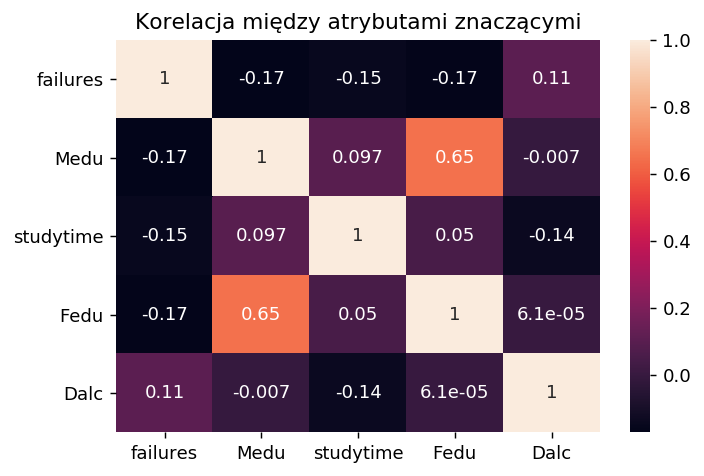

In [24]:
atrybutyZnaczace = list(corelacjeAtrybutow.abs().sort_values(ascending=False).index[0:5])
klasyfikacje = list(df.columns[-3:])

plt.figure(dpi=130)
plt.title("Korelacja między atrybutami znaczącymi")
sns.heatmap(df[atrybutyZnaczace].corr(), annot=df[atrybutyZnaczace].corr())

Jedyna wyraźna korelacja między atrybutami znaczącymi jest pomiędzy edukacją matki i ojca.

Co ciekawe **czas nauki** nie jest skorelowany z innymi parametrami. Zaprzecza to hipotezie, że to czas nauki jest głównym czynnikiem wpływającym na ocenę.

TODO: Opisać więcej o realiach

## Wybór parametrów znaczących

Z fragmentu macierzy koralcji przedstawionego powyżej wynika, że największy wpływ na oceny mają
* Ilość oblanych przedmiotów
* Edukacja matki
* Edukacja ojca
* Czas poświęcony na naukę
* Ilość sporzywanego alkocholu w dni robocze **TODO:** Może zrobić kategoryczny czy powyżej X?

Natomiast następujące parametry mają znikomy wpływ na oceny
* Relacje rodzinne TODO: Też można zobaczyć czy bardzo złe relacje nie mają wpływu
* Stan zdrowia
* Częstotliwość wyjść ze znajomymi

## Analiza podobieństw między danymi

Może nie koniecznie ten punkt jest potrzebny

## Testy wybranych klasyfikatorów